In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mpitree.neighbors import KNeighborsClassifier, KNeighborsRegressor

np.random.seed(42)
plt.rcParams["font.family"] = "monospace"

In [2]:
# dist = euclidean_distances(X, self.X_)
# closest = np.argsort(dist, axis=1)[:, : self.n_neighbors]

# if self.criterion == "weighted":
#     sorted_dist = np.sort(dist, axis=1)[:, : self.n_neighbors]

#     def cost(x, z):
#         a = [x[np.where(self.y_[z] == t)] for t in self.classes_]

#         b = []
#         for t in self.classes_:
#             b.append(
#                 np.sum(np.reciprocal(a[t] + 1e-4) ** 2) * int(bool(a[t].size))
#             )

#         return np.argmax(b)

#     result = []
#     for x, z in zip(sorted_dist, closest):
#         result.append(cost(x, z))
#     return np.array(result)
# else:
#     neighbors = mode(self.y_[closest], axis=1, keepdims=False)
#     return neighbors.mode


### `KNeighborsClassifier` vizualization on the `sklearn.datasets.make_moons` dataset

$$ \mathcal{h(\hat{x};k)} = z = \argmax \|\text{X}_n-\hat{x}_n\|$$


In [3]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

# add outlier to existing dataset
X = np.insert(X, 0, [[1.75, -0.3]], axis=0)
y = np.insert(y, 0, [0], axis=0)

In [4]:
n_classes = np.unique(y)
colors, markers = ("w", "darkgray"), ("s", "^")


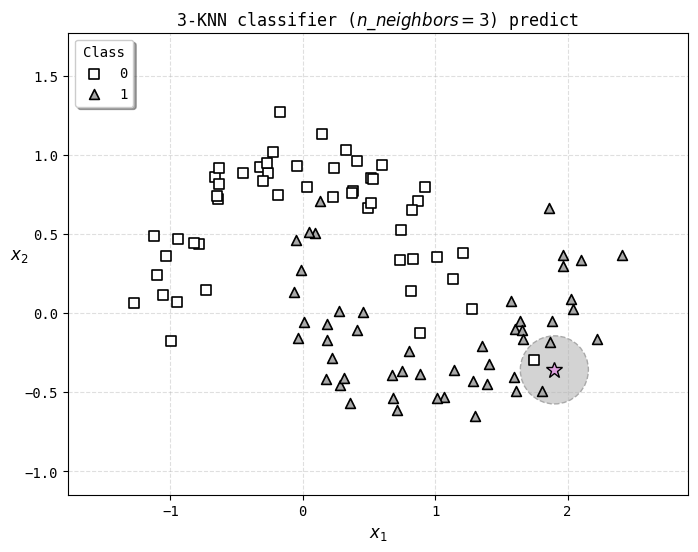

In [5]:
n_neighbors = 3
test_point = np.array([[1.9, -0.36]])

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(figsize=(8, 6))

for t, c, marker in zip(n_classes, colors, markers):
    plt.scatter(
        X[y == t, 0],
        X[y == t, 1],
        c=c,
        s=50,
        linewidth=1.2,
        marker=marker,
        edgecolors="k",
        label=t,
        zorder=2,
    )

plt.plot(
    test_point[0, 0],
    test_point[0, 1],
    marker="*",
    markersize=12,
    markeredgecolor="k",
    markerfacecolor="plum",
    zorder=2,
)

plt.scatter(
    test_point[0, 0],
    test_point[0, 1],
    s=2400,
    facecolors="lightgray",
    edgecolors="darkgray",
    linestyle="--",
    zorder=1,
)

plt.title(f"{n_neighbors}-KNN classifier ($n\_neighbors={n_neighbors}$) predict")
plt.legend(title="Class", loc="upper left", shadow=True)

plt.xlabel("$x_1$", fontsize=12)
plt.ylabel("$x_2$", fontsize=12, rotation=0)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.grid(linestyle="--", alpha=0.4)
plt.show()

### Decision Boundaries with varying `KNeighborsClassifier.n_neighbors` and `DecisionTreeClassifier.max_depth` values


In [6]:
from sklearn.tree import DecisionTreeClassifier

clfs = [KNeighborsClassifier(n_neighbors=k).fit(X, y) for k in (1, 15, 50)] + [
    DecisionTreeClassifier(max_depth=d).fit(X, y) for d in (None, 2, 1)
]

labels = [f"{k}-KNN" for k in (1, 15, 50)] + [f"{d}-DT" for d in (None, 2, 1)]

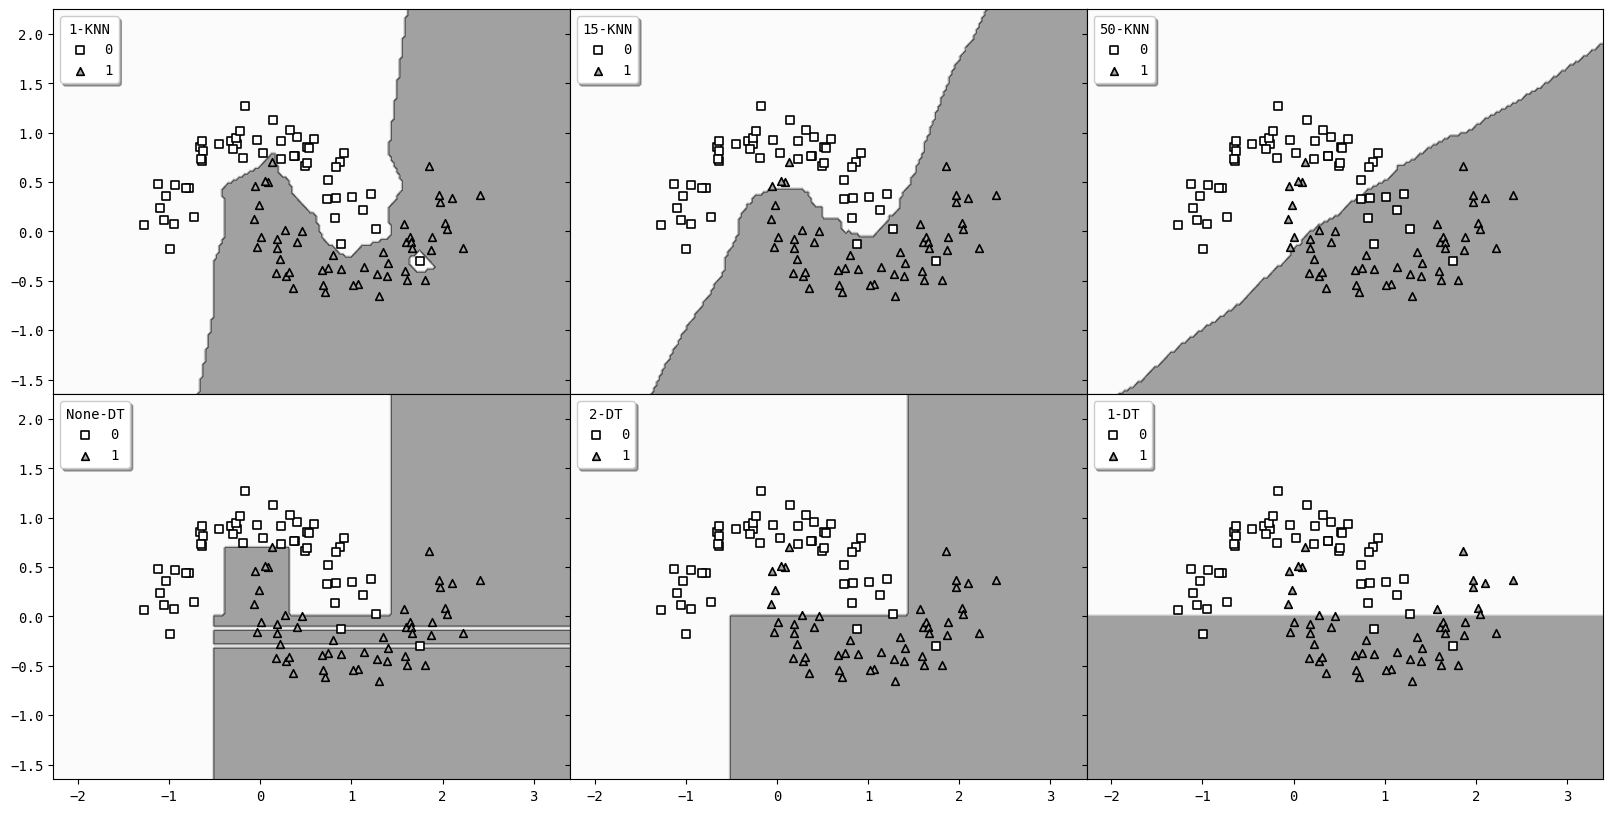

In [7]:
from itertools import product

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.03), np.arange(y_min, y_max, 0.03))

n_rows, n_cols = 2, 3
fig, axs = plt.subplots(
    n_rows,
    n_cols,
    sharex="col",
    sharey="row",
    figsize=(20, 10),
    gridspec_kw={"wspace": 0, "hspace": 0},
)

for idx, clf, title in zip(product(range(n_rows), range(n_cols)), clfs, labels):
    z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)

    axs[idx[0], idx[1]].contourf(xx, yy, z, alpha=0.4, cmap="Greys")

    for t, c, marker in zip(n_classes, colors, markers):
        axs[idx[0], idx[1]].scatter(
            X[y == t, 0],
            X[y == t, 1],
            c=c,
            s=30,
            linewidth=1.2,
            marker=marker,
            edgecolors="k",
            label=t,
        )

    axs[idx[0], idx[1]].legend(title=title, loc="upper left", shadow=True)

plt.show()

### `KNeighborsRegressor` vizualization on a noisy $sin$ function with varying `n_neighbors` values

In [8]:
# sorted array of shape (80, 1) ranging from [0, 5)
X_sin = np.sort(5 * np.random.rand(80, 1), axis=0)
y_sin = np.sin(X_sin).ravel()  # true values for sin function with shape (80,)
y_sin[::5] += 3 * (0.5 - np.random.rand(16))  # apply noise to every fifth true value

# array of shape (500, 1) ranging from [0, 5) incrementally by 0.01
X_sin_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

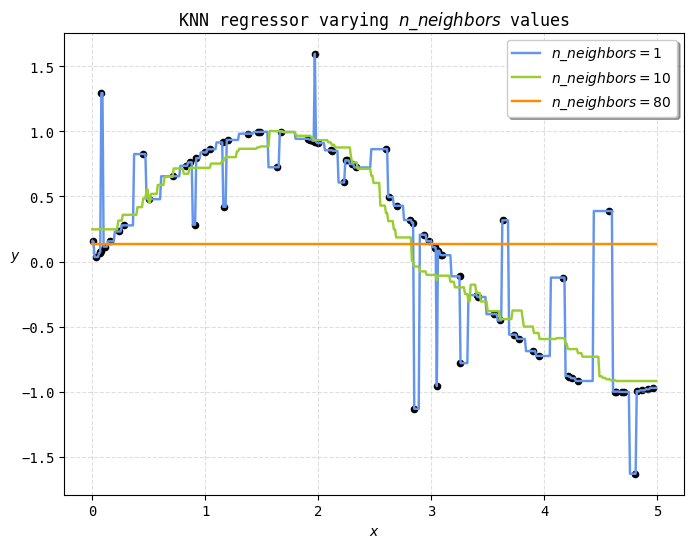

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(X_sin, y_sin, s=20, c="k")

regrs = [KNeighborsRegressor(n_neighbors=k).fit(X_sin, y_sin) for k in (1, 10, 80)]
colors = "cornflowerblue", "yellowgreen", "darkorange"

for regr, color in zip(regrs, colors):
    y_sin_pred = regr.predict(X_sin_test)
    plt.plot(
        X_sin_test,
        y_sin_pred,
        color=color,
        label=f"$n\_neighbors={regr.n_neighbors}$",
        linewidth=1.75,
    )

plt.title(f"KNN regressor varying $n\_neighbors$ values")

plt.xlabel("$x$")
plt.ylabel("$y$", rotation=0)

plt.legend(shadow=True)
plt.grid(linestyle="--", alpha=0.4)

plt.show()